Задание 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Задание 2

In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Задание 3

In [5]:
df_new = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


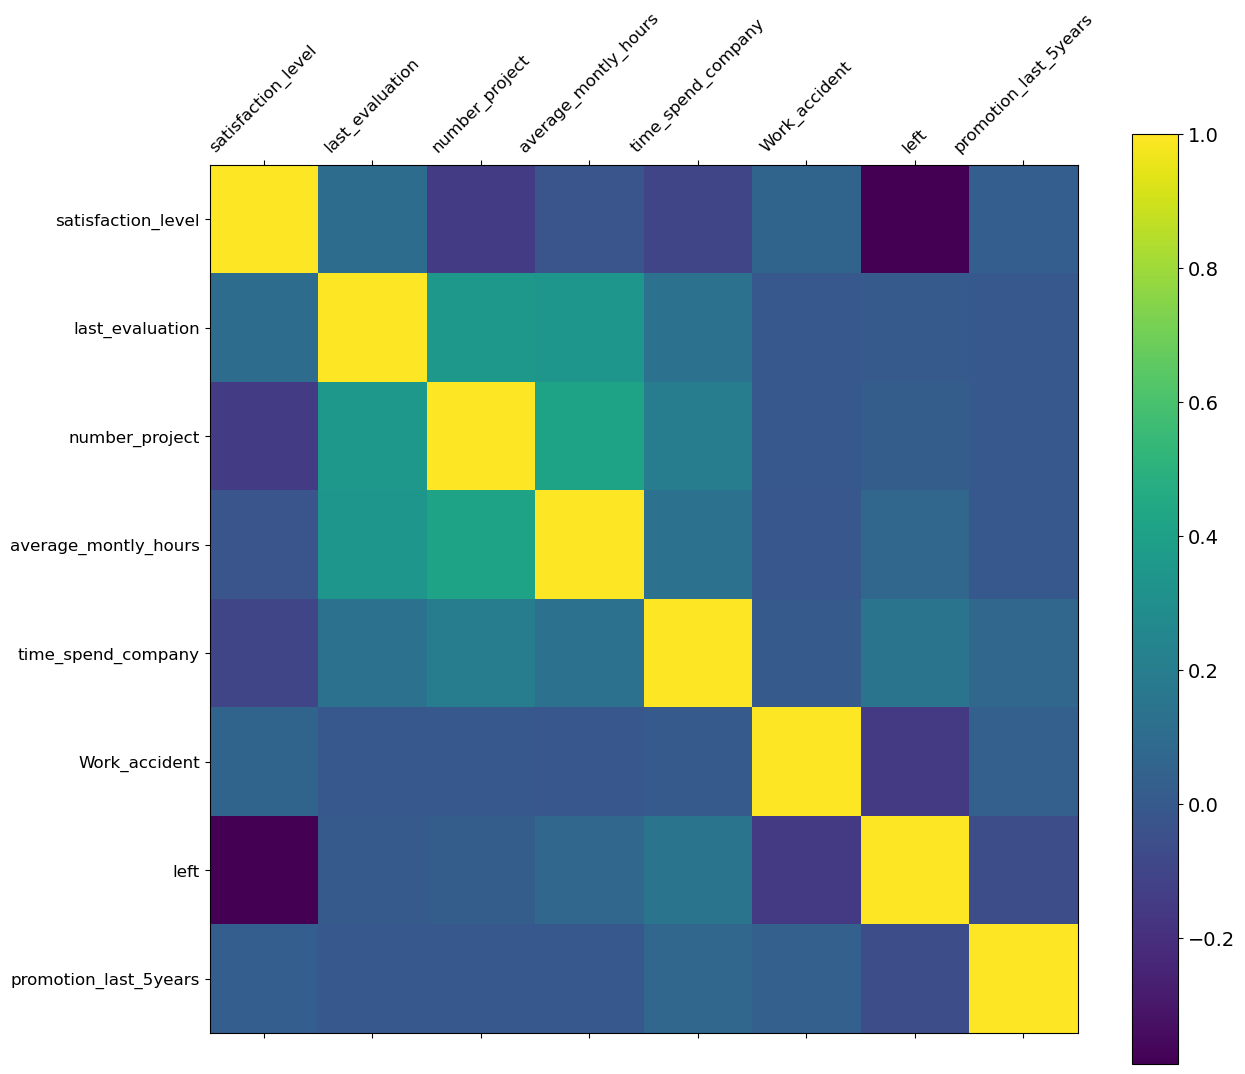

In [6]:
f = plt.figure(figsize=(14, 12))
plt.matshow(df_new.corr(), fignum=f.number)
plt.xticks(range(df_new.shape[1]), df_new.columns, fontsize=12, rotation=45)
plt.yticks(range(df_new.shape[1]), df_new.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

Самые скоррелированные:

average_montly_hours и number_project
last_evaluation и number_project

Менее скоррелированные:

left и satisfaction_level
left и Work_accident


Задание 4

In [7]:
df.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

Задание 5

<Axes: ylabel='salary'>

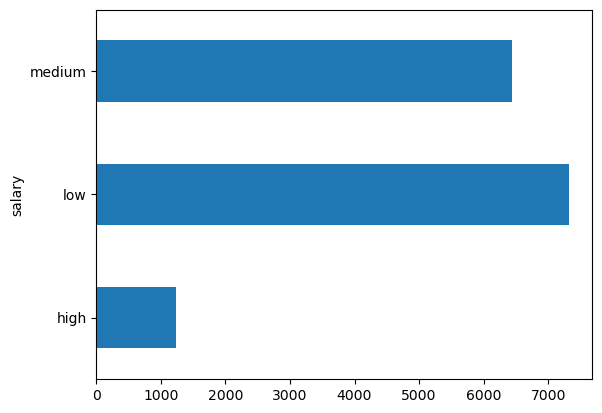

In [8]:
df.groupby('salary')['salary'].count().plot(kind="barh")

Задание 6

In [9]:
df_r = df.groupby([df['department'],df['salary']])[['salary']].count()
df_r

salary
department  salary        
IT          high        83
            low        609
            medium     535
RandD       high        51
            low        364
            medium     372
accounting  high        74
            low        358
            medium     335
hr          high        45
            low        335
            medium     359
management  high       225
            low        180
            medium     225
marketing   high        80
            low        402
            medium     376
product_mng high        68
            low        451
            medium     383
sales       high       269
            low       2099
            medium    1772
support     high       141
            low       1146
            medium     942
technical   high       201
            low       1372
            medium    1147

<Axes: ylabel='department,salary'>

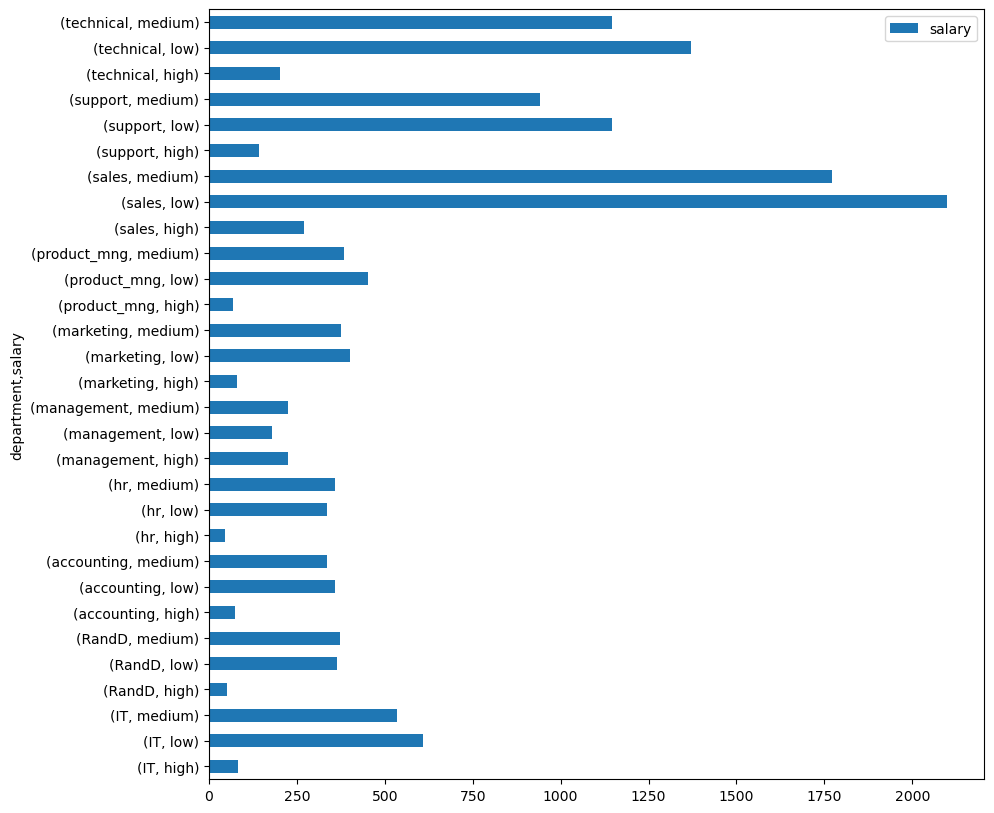

In [10]:
df_r.plot(kind="barh",figsize=(10,10))

Задание 7

In [11]:
df_high = list(df.loc[df['salary'] == 'high']['average_montly_hours'])

In [12]:
df_low = list(df.loc[df['salary'] == 'low']['average_montly_hours'])

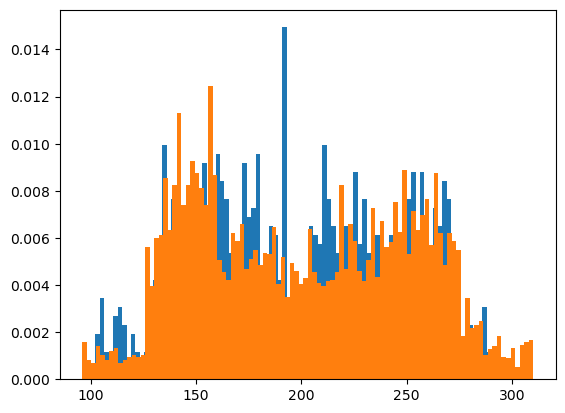

In [13]:
plt.hist(df_high, bins=100, density=True);
plt.hist(df_low, bins=100, density=True);

In [14]:
t, p = stats.ttest_ind(df_high, df_low)
print(t, p)

-0.7288680398062308 0.4661023478267259


При уровне значимости 0.05 p больше - гипотеза не верна.
Оклад не влияет на рабочее время.


Задание 8

In [15]:
df_left = df.loc[df['left'] == 1]
df_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
len(df_left.loc[df_left['promotion_last_5years'] == 1])/len(df_left)

0.005320638476617194

In [17]:
df_left['satisfaction_level'].mean()

0.4400980117614114

In [18]:
df_left['number_project'].mean()

3.8555026603192384

In [19]:
df_noleft = df.loc[df['left'] == 0]
df_noleft.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [20]:
len(df_noleft.loc[df_noleft['promotion_last_5years'] == 1])/len(df_noleft)

0.026251312565628283

In [21]:
df_noleft['satisfaction_level'].mean()

0.666809590479524

In [22]:
df_noleft['number_project'].mean()

3.786664333216661

Задание 9

In [23]:
left = pd.array(df_new['left'])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new[['satisfaction_level','last_evaluation','number_project',
                                                            'average_montly_hours','time_spend_company','Work_accident',
                                                            'promotion_last_5years']], left, test_size=0.20)

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [26]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [27]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,1,1
2,0,1
3,0,0
4,0,0
...,...,...
2995,0,0
2996,0,0
2997,1,0
2998,0,0


In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7643333333333333

Исходя из п.3 на увольнение мало какие другие данные влияют.